In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [53]:
#TASK1_A : LOAD DATA SET INTO PYTHON NOTEBOOK
df=pd.read_csv(r'Downloads/DS1_C9_S2_Practice_BikeSales_Data.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18-02-2014,18,February,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,04-03-2014,4,March,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [54]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
#TASK1_B:SELECT FOUR FEATURES LISTED IN PREVIOUS FILE

In [55]:
df1=df[['Order_Quantity','Unit_Price','Unit_Cost','Customer_Age']]
df1

,Order_Quantity,Unit_Price,Unit_Cost,Customer_Age
0,8.0,120.0,45,19
1,8.0,120.0,45,19
2,5.0,120.0,45,29
3,7.0,120.0,45,29
4,2.0,120.0,45,29
...,...,...,...,...
495,13.0,5.0,2,37
496,31.0,5.0,2,37
497,11.0,5.0,2,37
498,5.0,5.0,2,37


In [ ]:
#TASK1_3 DESCRIBE DATA FOR UNDRSTANDING FEATURE

In [56]:
df1.info()
df1.describe
df1.dtypes
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Quantity  495 non-null    float64
 1   Unit_Price      497 non-null    float64
 2   Unit_Cost       500 non-null    int64  
 3   Customer_Age    500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


,Order_Quantity,Unit_Price,Unit_Cost,Customer_Age
0,8.0,120.0,45,19
1,8.0,120.0,45,19
2,5.0,120.0,45,29
3,7.0,120.0,45,29
4,2.0,120.0,45,29


In [ ]:
#TASK2: MISSING VALUES TREATMENT

In [58]:
df1.isnull().sum()

Order_Quantity    0
Unit_Price        0
Unit_Cost         0
Customer_Age      0
dtype: int64

In [57]:
# Fill missing values with the mean 
df1['Order_Quantity'] = df1['Order_Quantity'].fillna(df1['Order_Quantity'].mean())
df1['Unit_Price'] = df1['Unit_Price'].fillna(df1['Unit_Price'].mean())


C:\Users\marur\AppData\Local\Temp\ipykernel_9544\2808405544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Order_Quantity'] = df1['Order_Quantity'].fillna(df1['Order_Quantity'].mean())
C:\Users\marur\AppData\Local\Temp\ipykernel_9544\2808405544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Unit_Price'] = df1['Unit_Price'].fillna(df1['Unit_Price'].mean())


In [ ]:
#The data of 'Cost' feature ranges between 2 and 1350, while the data of 'Order_Quantity' ranges between 1 and 32. 
#There are significant differences among the data of other features too. 
#The team is worried about the accuracy of revenue prediction due to this data biasing. Help the team resolve the issue.

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Unit_Cost', 'Order_Quantity']])

# Replace the original columns with scaled values (if needed)
df1[['Unit_Cost', 'Order_Quantity']] = scaled_features
scaled_features

C:\Users\marur\AppData\Local\Temp\ipykernel_9544\3091730809.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Unit_Cost', 'Order_Quantity']] = scaled_features


array([[0.75438596, 0.22580645],
       [0.75438596, 0.22580645],
       [0.75438596, 0.12903226],
       [0.75438596, 0.19354839],
       [0.75438596, 0.03225806],
       [0.75438596, 0.        ],
       [0.75438596, 0.        ],
       [0.75438596, 0.        ],
       [0.75438596, 0.16129032],
       [0.75438596, 0.22580645],
       [0.75438596, 0.06451613],
       [0.75438596, 0.        ],
       [0.75438596, 0.16129032],
       [0.75438596, 0.12903226],
       [0.75438596, 0.09677419],
       [0.75438596,        nan],
       [0.75438596,        nan],
       [0.75438596,        nan],
       [0.75438596, 0.74193548],
       [0.75438596, 0.70967742],
       [0.75438596, 0.77419355],
       [0.75438596, 0.70967742],
       [0.75438596, 0.03225806],
       [0.75438596, 0.        ],
       [0.75438596, 0.35483871],
       [0.75438596, 0.41935484],
       [0.75438596, 0.19354839],
       [0.75438596, 0.22580645],
       [0.75438596, 0.        ],
       [0.75438596, 0.        ],
       [0.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Unit_Cost', 'Order_Quantity']])

# Replace the original columns with scaled values (if needed)
df1[['Unit_Cost', 'Order_Quantity']] = scaled_features

scaled_features

C:\Users\marur\AppData\Local\Temp\ipykernel_9544\2917845633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Unit_Cost', 'Order_Quantity']] = scaled_features


array([[ 1.30887799, -0.58180436],
       [ 1.30887799, -0.58180436],
       [ 1.30887799, -0.90648661],
       [ 1.30887799, -0.69003177],
       [ 1.30887799, -1.23116886],
       [ 1.30887799, -1.33939627],
       [ 1.30887799, -1.33939627],
       [ 1.30887799, -1.33939627],
       [ 1.30887799, -0.79825919],
       [ 1.30887799, -0.58180436],
       [ 1.30887799, -1.12294144],
       [ 1.30887799, -1.33939627],
       [ 1.30887799, -0.79825919],
       [ 1.30887799, -0.90648661],
       [ 1.30887799, -1.01471402],
       [ 1.30887799,         nan],
       [ 1.30887799,         nan],
       [ 1.30887799,         nan],
       [ 1.30887799,  1.14983431],
       [ 1.30887799,  1.0416069 ],
       [ 1.30887799,  1.25806173],
       [ 1.30887799,  1.0416069 ],
       [ 1.30887799, -1.23116886],
       [ 1.30887799, -1.33939627],
       [ 1.30887799, -0.14889469],
       [ 1.30887799,  0.06756015],
       [ 1.30887799, -0.69003177],
       [ 1.30887799, -0.58180436],
       [ 1.30887799,

In [ ]:
#TASK2 Perform the following sub-tasks to select the best feature for revenue prediction:
#Find the correlation between ‘Revenue’ and all four features in consideration.
#Select the feature that has the maximum correlation value.


In [61]:
#Find the correlation between ‘Revenue’ and all four features in consideration.
correlation_price = df['Revenue'].corr(df1['Unit_Price'])

# Correlation between 'Revenue' and 'Unit_Cost'
correlation_cost = df['Revenue'].corr(df1['Unit_Cost'])

# Correlation between 'Revenue' and 'Order_Quantity'
correlation_quantity = df['Revenue'].corr(df1['Order_Quantity'])

# Correlation between 'Revenue' and 'Customer_Age'
correlation_age = df['Revenue'].corr(df1['Customer_Age'])

# Print the correlation values
print(f"The correlation between 'Revenue' and 'Unit_Price' is: {correlation_price}")
print(f"The correlation between 'Revenue' and 'Unit_Cost' is: {correlation_cost}")
print(f"The correlation between 'Revenue' and 'Order_Quantity' is: {correlation_quantity}")
print(f"The correlation between 'Revenue' and 'Customer_Age' is: {correlation_age}")

The correlation between 'Revenue' and 'Unit_Price' is: 0.6332933291771261
The correlation between 'Revenue' and 'Unit_Cost' is: 0.6420973220920847
The correlation between 'Revenue' and 'Order_Quantity' is: 0.03850455133703233
The correlation between 'Revenue' and 'Customer_Age' is: 0.10203951448822929


In [62]:
#Select the feature that has the maximum correlation value
# Calculate correlations
correlations = {
    'Unit_Price': df['Revenue'].corr(df1['Unit_Price']),
    'Unit_Cost': df['Revenue'].corr(df1['Unit_Cost']),
    'Order_Quantity': df['Revenue'].corr(df1['Order_Quantity']),
    'Customer_Age': df['Revenue'].corr(df1['Customer_Age']),
}

# Finding the feature with the maximum correlation
best_feature = max(correlations, key=correlations.get) 
max_correlation_value = correlations[best_feature]
print("Correlation of 'Revenue' with each feature:")
for feature, value in correlations.items():
    print(f"  {feature}: {value}")
print(f"\nThe feature with the highest correlation with 'Revenue' is '{best_feature}' with a correlation value of {max_correlation_value}.")


Correlation of 'Revenue' with each feature:
  Unit_Price: 0.6332933291771261
  Unit_Cost: 0.6420973220920847
  Order_Quantity: 0.03850455133703233
  Customer_Age: 0.10203951448822929

The feature with the highest correlation with 'Revenue' is 'Unit_Cost' with a correlation value of 0.6420973220920847.


In [ ]:
#TASK3
#Build a simple linear model with only one selected feature.

#Train the model and perform revenue prediction with this one selected feature.

In [69]:
selected_feature = 'Unit_Cost'  
X = df[[selected_feature]] 
y = df['Revenue']  # Target variable
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Create and train the linear regression model
Lg = LinearRegression()
Lg.fit(X_train, y_train)
# Making predictions
y_predictions = Lg.predict(X_test)
print(f"Linear Model Trained with Feature: {selected_feature}")
y_predictions

Linear Model Trained with Feature: Unit_Cost


array([ 99.56861285, 734.87120866,  99.56861285, 129.1175708 ,
       941.71391427, 129.1175708 , 129.1175708 , 941.71391427,
       734.87120866,  99.56861285, 734.87120866, 114.34309183,
       129.1175708 , 734.87120866,  99.56861285, 129.1175708 ,
        99.56861285, 734.87120866, 129.1175708 , 129.1175708 ,
        99.56861285,  99.56861285,  99.56861285,  99.56861285,
       734.87120866,  99.56861285,  99.56861285, 114.34309183,
       734.87120866, 129.1175708 ,  99.56861285, 129.1175708 ,
        99.56861285,  99.56861285, 734.87120866, 129.1175708 ,
       129.1175708 , 734.87120866, 114.34309183, 734.87120866,
       129.1175708 , 734.87120866,  99.56861285,  99.56861285,
       734.87120866, 734.87120866, 734.87120866, 734.87120866,
        99.56861285, 734.87120866, 734.87120866,  99.56861285,
       941.71391427,  99.56861285, 114.34309183, 734.87120866,
       941.71391427, 734.87120866, 114.34309183, 734.87120866,
        99.56861285,  99.56861285, 129.1175708 ,  99.56

In [ ]:
#Evaluate intercept and slope values.

In [70]:
intercept = Lg.intercept_
slope = Lg.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 70.0196549093051
Slope: 14.77447897220619


In [ ]:
#Task 4 
#Evaluate the model using MSE, RMSE, MAE, R² values.

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_predictions,y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_predictions,y_test)
r2= r2_score(y_predictions,y_test)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 289011.2341099955
Root Mean Squared Error (RMSE): 537.5976507668123
Mean Absolute Error (MAE): 243.06615246738835
R² Score: -1.8499163301035817


In [ ]:
#Fit a linear regression model to the dataset (line plot) and visualize it with the data.

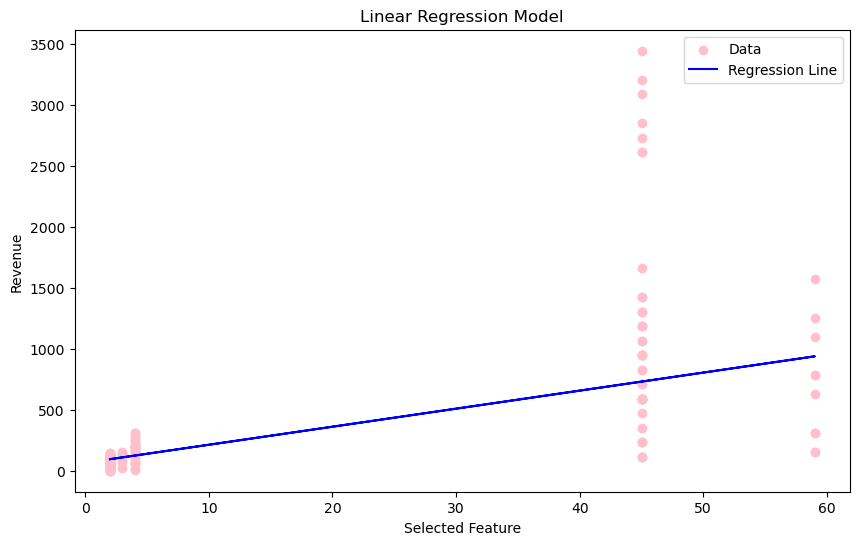

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='pink', label='Data')
plt.plot(X_test, y_predictions, color='blue', label='Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Selected Feature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [ ]:
#Plot the residuals of linear regression.

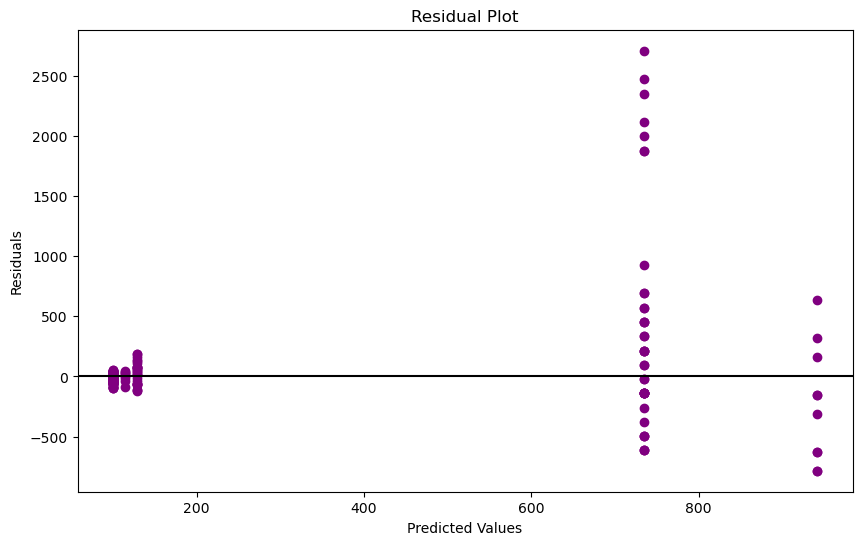

In [82]:
residuals = y_test - y_predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_predictions, residuals, color='purple')
plt.axhline(y=0, color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Write the overall interpretation of the model performance from all the above evaluation parameters and assumptions

In [ ]:
Interpretation:
1. MSE, RMSE, and MAE provide insights into the average errors of the model.
2. A high R² value indicates the model explains the significant portion of the variance.
3. Residuals should be randomly distributed around zero.
